In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
import os

def clear_cache():
    with open(r'src/matlab/pv_boost_avg_rload.txt', 'w') as f:
        f.write('')
    with open(r'src/matlab/pv_boost_avg_rload_mpp_2.txt', 'w') as f:
        f.write('')



In [3]:
clear_cache()

In [4]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [
            CB91_Blue,
            CB91_Amber,
            CB91_Green,
            CB91_Violet,
            CB91_Pink,
            CB91_Purple,
            ]
              
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [5]:
IRRADIANCES = [
    [1000, 1000, 1000, 1000,],
    ]
CELL_TEMPS = [
    [25, 25, 25, 25],
]
TEMPERATURES = [
    [ShadedArray.ambient_temp_from_cell(g, ct)]
    for amb in zip(IRRADIANCES, CELL_TEMPS)
    for g, ct in zip(*amb)
]
RESISTANCES = [1, 10, 100, 1000]

pvsyss = ShadedArray.get_default_array()

In [6]:
curves = []
powers = []
mpps = []

for r in RESISTANCES:
    clear_cache()
    pvsyss.set_rload_resistance(r)
    pvsyss.clear_cache()

    for g, t in zip(IRRADIANCES, TEMPERATURES):
        pvsyss.cache
        pvsyss.simulate(
            duty_cycle=0.0,
            irradiance=g,
            ambient_temperature=t,
        )
        curve = pvsyss.get_shaded_iv_curve(curve_points=1000)
        mpp = pvsyss.mpp_from_curve(curve)

        powers.append(pvsyss.power(curve.voltage, curve.current))
        mpps.append(mpp)
        curves.append(curve)

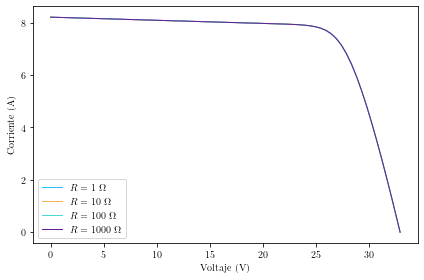

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")

# plot iv curve
for curve, r, color in zip(curves, RESISTANCES, color_list):
    label = f'$R={r} \, \, \Omega$'
    ax.plot(curve.voltage, curve.current, linewidth=1.0, label=label, color=color)

ax.legend(loc='lower left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_multiple_iv_curves_rvar.pdf', bbox_inches='tight')

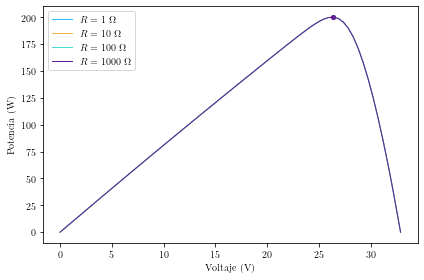

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Potencia (W)")

# plot pv curve
for curve, p, mpp, color, r in zip(curves, powers, mpps, color_list, RESISTANCES):
    label = f'$R={r} \, \, \Omega$'
    ax.plot(curve.voltage, p, linewidth=1.0, label=label, color=color)
    ax.plot(mpp.voltage, mpp.current * mpp.voltage, 'o', color=color, ms=4.0)
    
# dummy plot for legend
# ax.plot([],[], 'o', color='k', ms=4.0, label='$\\textrm{GMPP}$')

ax.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_multiple_pv_curves_rvar.pdf', bbox_inches='tight')

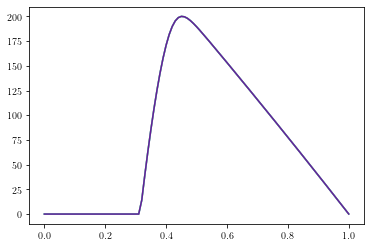

In [9]:
plt.plot(curves[0].duty_cycle, powers[0])
plt.plot(curves[1].duty_cycle, powers[1])
plt.plot(curves[2].duty_cycle, powers[2])
plt.plot(curves[3].duty_cycle, powers[3])

In [10]:
for mpp in mpps:
    print(f'V={mpp.voltage}, I={mpp.current}, P={mpp.power}')

V=26.408576905151907, I=7.5769051604838795, P=200.09528263368088
V=26.408576905151907, I=7.5769051604838795, P=200.09528263368088
V=26.408576905151907, I=7.5769051604838795, P=200.09528263368088
V=26.408576905151907, I=7.5769051604838795, P=200.09528263368088
